# 图像的基本操作

## 操作像素

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('jpg.jpg')

# [B, G, R]
print(img[0][0])
# B
print(img[0][0][0])

[255 255 255]
255


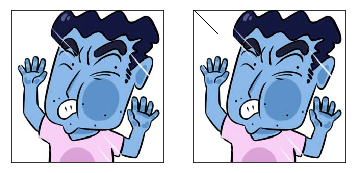

In [2]:
plt.subplot(121)
plt.imshow(img)
plt.xticks([]), plt.yticks([]) 

for i in range(50):
    img[i][i] = [0, 0, 0]

plt.subplot(122)
plt.imshow(img)
plt.xticks([]), plt.yticks([]) 
plt.show()

不推荐这样操作单个像素，对于np来说效率很低。这种方式适合选中ROI（感兴趣区域），如果要操作单个像素，最好用np的`item()`方法与`itemset()`方法。前者返回一个Python的标量，后者向数组中输入一个标量。

In [3]:
print(img.item(0,0,0))
print(img.item(0,0,1))
print(img.item(0,0,2))
# 元素索引0~WxH
print(img.item(0))
print(img.item(3))

img.itemset((0,0,0),100)
print(img.item(0,0,0))

0
0
0
0
255
100


## 获取图像属性

In [4]:
# return  rows, columns, and channels 
s = img.shape
print(s)

(300, 300, 3)


若返回只有行，列，证明这是个灰度图像。

In [5]:
# 像素总数
img.size == s[0]*s[1]*s[2]

True

In [6]:
# data tyoe
img.dtype

dtype('uint8')

## ROI区域

即感兴趣区域。可以通过数组索引选中一个区域的像素。

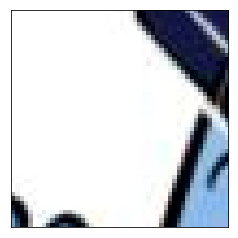

In [7]:
roi = img[50:100, 50:100]

plt.imshow(roi)
plt.xticks([]), plt.yticks([])
plt.show()

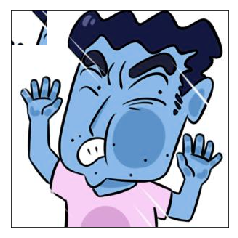

In [8]:
img[0:50, 0:50] = roi

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

## 拆分与合并通道

这个前面有提到过，除了`split`与`merge`方法，还可以这样。

需要注意的是，`split`方法比较费时，最好用np indexing。

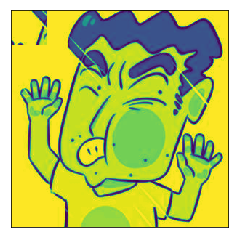

In [9]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

plt.imshow(r)
plt.xticks([]), plt.yticks([])
plt.show()

## 设置边框(Padding)

**cv.copyMakeBorder(	src, top, bottom, left, right, borderType[, dst[, value]])**

- src - input image
- top, bottom, left, right - border width in number of pixels in corresponding directions
- borderType - Flag defining what kind of border to be added. It can be following types:
- cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
- cv.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
- cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
- cv.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
- cv.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
- value - Color of border if border type is cv.BORDER_CONSTANT


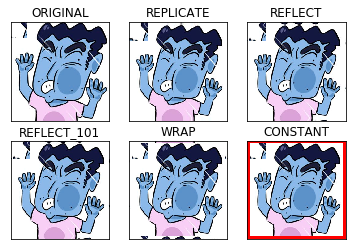

In [10]:
BLUE = [255,0,0]
img1 = img

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL'),plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE'),plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT'),plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101'),plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP'),plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT'),plt.xticks([]), plt.yticks([])
plt.show()

## 图像相加

其实就是矩阵运算。

In [11]:
x = np.uint8([250])
y = np.uint8([10])

print(cv.add(x, y)) # 260 -> 255

print(x+y) # 260 % 256 = 4

[[255]]
[4]


## 图像混合

- 	dst	=	cv.addWeighted(	src1, alpha, src2, beta, gamma[, dst[, dtype]]	)

也属于加法的范畴，只不过混合时有不同的权重。

$$g(x) = (1 - \alpha)f_{0}(x) + \alpha f_{1}(x)$$

应用于图像：

$$dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma$$

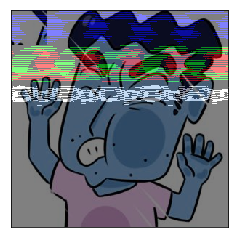

In [12]:
img2 = cv.imread('opencv-logo.png')
img2.resize(img1.shape)
dst = cv.addWeighted(img1,0.5,img2,0.5,0)

plt.imshow(dst)
plt.xticks([]), plt.yticks([])
plt.show()

## 位运算

包含了AND, OR, NOT, XOR。这对提取图像非常的有用。比如要把opencv logo放在图像上。

- https://docs.opencv.org/3.4.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14

- 	dst	=	cv.bitwise_not(	src[, dst[, mask]]	)
    $$ \texttt{dst} (I) = \neg \texttt{src} (I)$$
    
- 	dst	=	cv.bitwise_and(	src1, src2[, dst[, mask]]	)

    - Parameters
    - src1	first input array or a scalar.
    - src2	second input array or a scalar.
    - dst	output array that has the same size and type as the input arrays.
    - mask	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.
    
    $$\texttt{dst} (I) = \texttt{src1} (I) \wedge \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0$$

- dst	=	cv.bitwise_or(	src1, src2[, dst[, mask]]	)

- 	dst	=	cv.bitwise_xor(	src1, src2[, dst[, mask]]	)




In [13]:
img1 = cv.imread('jpg.jpg')
img2 = cv.imread('opencv-logo.png')

# 在原图左上角拿出一块和logo大小一样的感兴趣区域，之后把logo放原图左上角
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
cv.imshow('roi',roi)
cv.waitKey(0)
# 下面创建mask遮罩
# 首先把logo转成灰度图像
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
cv.imshow('gray',img2gray)
cv.waitKey(0)
# 通过设定阈值将像素值大小大于阈值10的设定为255，否则为0
# 这个函数目前第一次出现，估计后面会有更详细的介绍
# 返回值为阈值，与处理后的图像
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
print(ret)
cv.imshow('mask',mask)
cv.waitKey(0)
# mask取反,1变0，0变1
# 0为黑色，1为白色
mask_inv = cv.bitwise_not(mask)
cv.imshow('mask_inv',mask_inv)
cv.waitKey(0)
# Now black-out the area of logo in ROI
# roi与roi相与还是roi，但是这里有个mask
# 带有mask的区域也会参与到与运算中
# mask_inv为含有图像的部分为黑色，即0
# 其余颜色为白色，即1
# 白色部分相与不变换
# 黑色部分相与得0
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
cv.imshow('img1_bg',img1_bg)
cv.waitKey(0)
# Take only region of logo from logo image.
# img2为logo，mask为含有logo区域为白色（1），不含有部分为黑色（0）
# img2与img2与mask将logo部分提取出来
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
cv.imshow('img2_fg',img2_fg)
# Put logo in ROI and modify the main image
# 两者相加即将水印加到了原图上
dst = cv.add(img1_bg,img2_fg)
cv.imshow('dst',dst)
# 修改ROI区域
img1[0:rows, 0:cols ] = dst
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

10.0


## 测试性能

cv.getTickCount function returns the number of clock-cycles after a reference event (like the moment machine was switched ON) to the moment this function is called. So if you call it before and after the function execution, you get number of clock-cycles used to execute a function.

cv.getTickFrequency function returns the frequency of clock-cycles, or the number of clock-cycles per second. So to find the time of execution in seconds, you can do following:

In [14]:
import time
t1 = time.time()
e1 = cv.getTickCount()
# your code execution
time.sleep(0.5)
t2 = time.time()
e2 = cv.getTickCount()
# 输出秒
time = (e2 - e1)/ cv.getTickFrequency()
print(t2-t1, time)

0.500432014465332 0.5002317878340182


## OpenCV默认优化

In [15]:
cv.useOptimized()

True

In [16]:
%timeit res = cv.medianBlur(img,49)

11.5 ms ± 35 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
cv.setUseOptimized(False)
cv.useOptimized()

False

In [18]:
%timeit res = cv.medianBlur(img,49)

11.5 ms ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
